# Boundary Value Problem Example - Heated Rod
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

In [8]:
pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [33]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_bvp

# Dirichlet Boundary Conditions

The coefficient matrix looks like
\begin{equation}
\left[ {\begin{array}{*{20}{c}}
1&0&0& \cdots &0\\
1& - \left( 2 + \Delta {x^2}H \right)&1&0& \vdots \\
0& \ddots & \ddots & \ddots &0\\
 \vdots &0&1& - \left( 2 + \Delta x^2H \right)&1\\
0& \cdots &0&0&1
\end{array}} \right]
\left( {\begin{array}{*{20}{c}}
T_1\\
\begin{array}{l}
T_2\\
T_3
\end{array}\\
\begin{array}{l}
 \vdots \\
 \vdots 
\end{array}\\
T_{n - 1}\\
T_n
\end{array}} \right) 
= \left( {\begin{array}{*{20}{c}}
T_\rm{left}\\
- T_\infty \Delta {x^2}H\\
 \vdots \\
- T_\infty\Delta {x^2}H\\
T_\rm{right}
\end{array}} \right)
\end{equation}

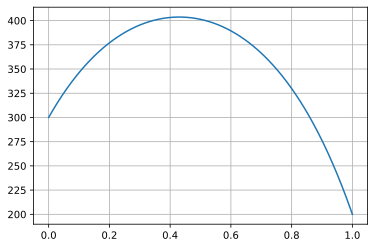

In [39]:
n = 200 # number of desired grid points
L = 1.0 # rod length
Tleft = 300
Tright = 200
Tinf = 500
h = 10 # heat transfer coefficient, due to advection of surrounding air

x = np.linspace(0, L, n) # create an array for the grid points x_i
dx = x[1] - x[0] # calculate grid spacing (grid spacing is constant here)

# create lower diagonal vector
ld = np.ones(n-1)
ld[-1] = 0.0

# create main diagonal vector
d = -(2.0 + dx*dx * h) * np.ones(n)
d[0] = 1.0
d[-1] = 1.0

# create upper diagonal vector
ud = np.ones(n-1)
ud[0] = 0.0

# combine those into a matrix
A = np.diag(ld,-1) + np.diag(d, 0) + np.diag(ud, 1)

# build the RHS array
rhs = - Tinf * dx*dx * h * np.ones(n)
rhs[0] = Tleft
rhs[-1] = Tright

# solve the system of equations
sol = np.linalg.solve(A, rhs)

plt.plot(x, sol)
# plt.ylim(min(sol), max(sol))
plt.grid()

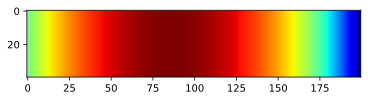

In [40]:
temperature = np.tile(sol,(40,1))
plt.imshow(temperature,cmap='jet')

# using solve_bvp

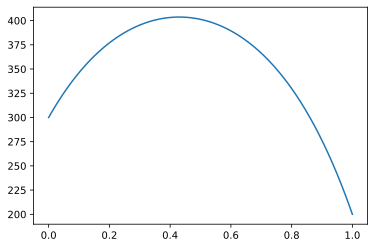

In [51]:
def ode(x,y):
    y0 = y[0]
    y1 = y[1]
    return np.array([y1, h*(y0 - Tinf)])
def bc(ya,yb):
    return np.array([ya[0]-Tleft, yb[0]-Tright])
y0 = 300*np.ones((2,n))
sol = solve_bvp(ode,bc,x,y0)
plt.plot(sol.x,sol.y[0])

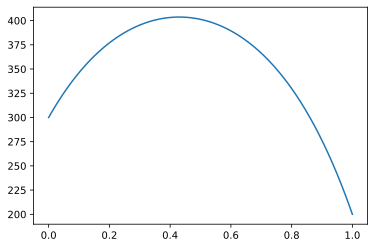

In [43]:
def ode(x,fvec):
    T = fvec[0]
    v = fvec[1]
    return np.array([v, h*(T - Tinf)])
def bc(ya,yb):
    return np.array([ya[0]-Tleft, yb[0]-Tright])
y0 = Tinf*np.ones((2,n))
sol = solve_bvp(ode,bc,x,y0)
plt.plot(sol.x,sol.y[0])

# Neumann Boundary Conditions

In [25]:
def solve_heat_eq_neumann(H, L, Tleft, β, Tinf, n):
    x = np.linspace(0, L, n)
    dx = x[1] - x[0]
    
    ld = np.ones(n-1)
    ld[-1] = 2.0
    
    d = -(2.0 + dx*dx * H) * np.ones(n)
    d[0] = 1.0
    
    ud = np.ones(n-1)
    ud[0] = 0.0
    
    A = np.diag(ld,-1) + np.diag(d, 0) + np.diag(ud, 1)
    
    rhs = - Tinf * dx*dx * H * np.ones(n)
    rhs[0] = Tleft
    rhs[-1] -= 2.0*β*dx
    
    sol = np.linalg.solve(A, rhs)
    return x, sol

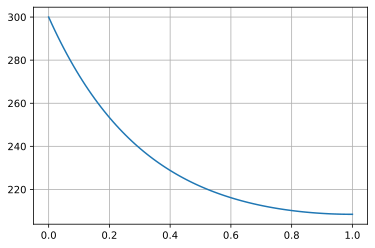

In [26]:
n = 100
L = 1.0
Tleft = 300
β = 0.0
Tinf = 200
h = 10.0
x, sol = solve_heat_eq_neumann(h, L, Tleft, β, Tinf, n)
plt.plot(x, sol)
plt.grid()

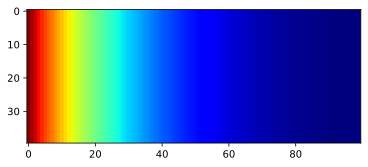

In [27]:
temperature = np.tile(sol,(40,1))
plt.imshow(temperature,cmap='jet')

# using solve_bvp

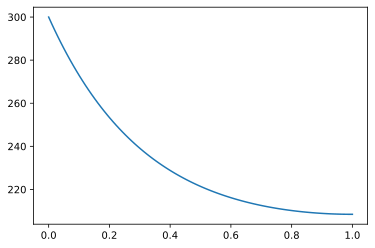

In [32]:
def ode(x,y):
    return np.array([y[1], h*(y[0] - Tinf)])
def bc(ya,yb):
    return np.array([ya[0]-Tleft, yb[1]-β])
y0 = Tinf*np.ones((2,n))
sol = solve_bvp(ode,bc,x,y0)
plt.plot(sol.x,sol.y[0])

# nonlinear bvp using solve_bvp